<a href="https://colab.research.google.com/github/LucasLessa1/challengeBain/blob/main/Desafio_Bain_%26_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1 - Imports**
First, we import the libraries that will be used throughout the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import gdown

#**2 - Pre-Processing**

Then we import the data into the notebook. It is important to note that as soon as the data was sent by the organizers (in .csv format), the group decided to save it in a folder in Google Drive. That way, the organizers at Bain would have no problems running the code.

In [2]:
#download data csv
def download(id):
  url = 'https://drive.google.com/uc?id=' + str(id)
  gdown.download(url, output = None, quiet = False)


download('1ysfB1yjSXUVn-pxo2Y5mlnNJo6d9JdjG')

Downloading...
From: https://drive.google.com/uc?id=1ysfB1yjSXUVn-pxo2Y5mlnNJo6d9JdjG
To: /content/historical-database.csv
100%|██████████| 3.64M/3.64M [00:00<00:00, 163MB/s]


Below, you can note that we used the "delimiter" parameter to separate the fields. Note also that the we renamed the destinated_area field, removing the extra comma.

In [3]:
df = pd.read_csv('historical-database.csv',delimiter =";")
df.rename(columns = {'destinated_area,':'destinated_area'}, inplace = True)
df

,year,city_code,product_type,product,destinated_area
0,01/01/1974,960b4f2c94a2fb2c,temporary,Others,"0,"
1,01/01/1974,746cc42bfb8f6b62,temporary,Others,"0,"
2,01/01/1974,6cce2bf873870afc,temporary,Others,"0,"
3,01/01/1974,4de42e351006a2ae,temporary,Others,"0,"
4,01/01/1974,5b6072f8f6d37acc,temporary,Others,"0,"
...,...,...,...,...,...
73739,01/01/2013,74d75dde6dc4a5ec,pasture,Livestock,"150866,5644"
73740,01/01/2014,74d75dde6dc4a5ec,pasture,Livestock,"152446,396"
73741,01/01/2015,74d75dde6dc4a5ec,pasture,Livestock,"154681,0205"
73742,01/01/2016,74d75dde6dc4a5ec,pasture,Livestock,"164706,2778"


When we import the data, all data types were designated as objects (mostly mixed numeric and non-numeric data type).

In [4]:
df.dtypes

year               object
city_code          object
product_type       object
product            object
destinated_area    object
dtype: object

But to do some treatment, we change the data type to string.

In [5]:
df = df.astype(str)

We noticed that some values were just commas, so we just interpreted them as empty, replacing them with NaN (not a number).

In [6]:
df.loc[df['destinated_area'] ==",", 'destinated_area'] = np.nan
df['destinated_area'].isna().sum()

39035

For now on, we continued to treat weird values, such as "0," and changing commas to dots.

In [7]:
df['destinated_area'] = df['destinated_area'].replace(['0,'],'0')
destinated_area = df['destinated_area'].to_list()
destinated_area = [item if type(item) ==float else item.replace(",", ".") for item in destinated_area]
df['destinated_area'] = destinated_area

Then, we change some data types to float (when that should be the case), or to date values.

In [8]:
df['destinated_area'] = df['destinated_area'].astype(float) 

In [9]:
column_mean = df["destinated_area"].mean()
df['destinated_area'] = df['destinated_area'].fillna(column_mean)

In [10]:
(df==0).sum()

year                  0
city_code             0
product_type          0
product               0
destinated_area    5643
dtype: int64

In [11]:
df['date'] = pd.to_datetime(df['year'],format= "%d/%m/%Y")

In [12]:
df['year'] = pd.DatetimeIndex(df['date']).year


The final result of the treatment is the below dataframe and data types.

In [13]:
df.dtypes

year                        int64
city_code                  object
product_type               object
product                    object
destinated_area           float64
date               datetime64[ns]
dtype: object

In [14]:
df

,year,city_code,product_type,product,destinated_area,date
0,1974,960b4f2c94a2fb2c,temporary,Others,0.0000,1974-01-01
1,1974,746cc42bfb8f6b62,temporary,Others,0.0000,1974-01-01
2,1974,6cce2bf873870afc,temporary,Others,0.0000,1974-01-01
3,1974,4de42e351006a2ae,temporary,Others,0.0000,1974-01-01
4,1974,5b6072f8f6d37acc,temporary,Others,0.0000,1974-01-01
...,...,...,...,...,...,...
73739,2013,74d75dde6dc4a5ec,pasture,Livestock,150866.5644,2013-01-01
73740,2014,74d75dde6dc4a5ec,pasture,Livestock,152446.3960,2014-01-01
73741,2015,74d75dde6dc4a5ec,pasture,Livestock,154681.0205,2015-01-01
73742,2016,74d75dde6dc4a5ec,pasture,Livestock,164706.2778,2016-01-01


# **3 - Importing other databases**

The .csv file provided by Bain contains only the date, city_code, product_type, product and destination_area fields, one of which is a hash. The group understands that this file is sufficient to make predictions. However, in search of a more accurate result, it would be interesting to aggregate other data sources in the bain dataframe. So it was done.

In this section, data on **livestock**, **weather**, **humidity** and **products** from Paraná are added to the dataframe.

In [94]:
download("1uQnV90A0SAFT1KxwjjUOBX4W9zkbZ-Vd") #https://drive.google.com/file/d/1uQnV90A0SAFT1KxwjjUOBX4W9zkbZ-Vd/view?usp=sharing
download('1RII2akbU72zngbRdUpFGIakxcmRoqTPN') #https://drive.google.com/file/d/1RII2akbU72zngbRdUpFGIakxcmRoqTPN/view?usp=sharing
download('1EY28_qJTSq8e0JHEfbeADPSkFCp2kV-T') #https://drive.google.com/file/d/1EY28_qJTSq8e0JHEfbeADPSkFCp2kV-T/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1uQnV90A0SAFT1KxwjjUOBX4W9zkbZ-Vd
To: /content/products_final.csv
100%|██████████| 37.2k/37.2k [00:00<00:00, 35.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RII2akbU72zngbRdUpFGIakxcmRoqTPN
To: /content/Meteorologia.csv
100%|██████████| 21.8M/21.8M [00:00<00:00, 68.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EY28_qJTSq8e0JHEfbeADPSkFCp2kV-T
To: /content/umidade.csv
100%|██████████| 1.32k/1.32k [00:00<00:00, 2.47MB/s]


In [95]:
df_products = pd.read_csv("/content/products_final.csv")
df_met = pd.read_csv("/content/Meteorologia.csv")
df_umidade = pd.read_csv("/content/umidade.csv")

We start treating the new product data to our main dataframe.

In [17]:
# droping unnecessary fields.
del df_products['Quantidade produzida (mil frutos)']
del df_products['Rendimento médio da produção (mil frutos por Hectare)']
del df_products["index"]

Next, we create a dictionary to unite the main dataframe product types (from Bain) with the new product data.

In [18]:
di = {"Arroz": "Rice", "Cacau": "Cocoa", "Soja": "Soy","Feijão":"Beans","Coco":"Others","Mandioca":"Cassava","Milho":"Corn","Maracujá":"Others" ,"Café":"Others", "Borracha":"Others" ,"Mamão":"Others", "Limão":"Others", "Algodão arbóreo":"Others", "Algodão herbáceo":"Others" ,"Sorgo":"Sorghum","Cacau":"Cocoa","Dendê":"Palm oil","Açaí":"Açaí","Outros":"Others"}
df_products['Produto'].replace(di, inplace=True)

In [19]:
df_products = df_products[df_products['Produto'] != "Others"]
df_products['Produto'].value_counts()

Rice        20
Cocoa       20
Palm oil    20
Beans       20
Cassava     20
Corn        20
Soy         20
Sorghum     20
Açaí         6
Name: Produto, dtype: int64

In [20]:
index = []
x,y = df_met.shape

for i in range(0,x,1):
  index.append(i)

df_met.insert(0, "Unnamed: 0", index, allow_duplicates = False)

Here, we merge both meteorology and Bain dataframes by the year fileds. For such, we will first create a year column, and then merge.

In [21]:
df_met['date'] = pd.to_datetime(df_met['DATA..YYYY.MM.DD.'],format= "%Y/%m/%d")
df_met['DATA..YYYY.MM.DD.'] = pd.DatetimeIndex(df_met['date']).year
df_met.rename(columns = {'DATA..YYYY.MM.DD.':'Ano'}, inplace = True)

In [22]:
df_met = df_met.replace(-9999.0,np.NaN)
df_met = df_met.groupby('Ano', as_index=False).mean()
df_met.rename(columns={'Ano':'year'}, inplace=True)

In [23]:
df_merge = df_umidade.merge(df_products,on="Ano",how='left')
df_merge.rename(columns={'Ano':'year'}, inplace=True)

df_merge = df_merge.merge(df_met, on="year", how='left')
df_merge = df_merge.merge(df, on="year", how='left')

pred_2018 = df_merge[df_merge['year'] == 2018]
pred_2019 = df_merge[df_merge['year'] == 2019]

Deleting unnecessary fields, renaming others.

In [24]:
del pred_2018['Unnamed: 0_x']
del pred_2018['Unnamed: 0_y']
del pred_2018['X']
del pred_2018['date']
del pred_2018['product']

del pred_2019['Unnamed: 0_x']
del pred_2019['Unnamed: 0_y']
del pred_2019['X']
del pred_2019['date']
del pred_2019['product']

pred_2018 = pred_2018.drop(["city_code","destinated_area"], axis=1)
pred_2019 = pred_2019.drop(["city_code","destinated_area"], axis=1)
pred_2018.rename(columns={'Produto':'product'}, inplace=True)
pred_2019.rename(columns={'Produto':'product'}, inplace=True)

Adding the products witch is not in our dataset.

In [25]:
df.groupby("product")["product_type"].unique()

product
Açaí                    [permanent]
Beans                   [temporary]
Cassava                 [temporary]
Cocoa                   [permanent]
Corn                    [temporary]
Livestock                 [pasture]
Others       [temporary, permanent]
Palm oil                [permanent]
Rice                    [temporary]
Sorghum                 [temporary]
Soy                     [temporary]
Name: product_type, dtype: object

In [26]:
#2018
new_others = pd.Series(data={"product":"Others", "product_type":"temporary"}, name='10')
new_livestock = pd.Series(data={"product":"Livestock", "product_type":"pasture"}, name='11')

pred_2018 = pred_2018.append(new_others, ignore_index=True)
pred_2018 = pred_2018.append(new_livestock, ignore_index=True)


#2019
new_others = pd.Series(data={"product":"Others", "product_type":"temporary"}, name='10')
new_livestock = pd.Series(data={"product":"Livestock", "product_type":"pasture"}, name='11')

pred_2019 = pred_2019.append(new_others, ignore_index=True)
pred_2019 = pred_2019.append(new_livestock, ignore_index=True)

In [27]:
pred_2018.fillna(pred_2018.mean(), inplace=True)
pred_2019.fillna(pred_2019.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Merging original dataframe with aditional datasets

In [28]:
df_products.rename(columns={'Ano':'year', 'Produto':'product'}, inplace=True)

In [29]:
df_with_products = df.merge(df_products, on=["year","product"], how="left")

In [30]:
df_total = df_with_products.merge(df_met, on="year", how="left")

In [31]:
del df_total['Unnamed: 0_x']
del df_total['Unnamed: 0_y']
del df_total['X']
del df_total['date']

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df_total[['product', "product_type"]]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df_total.join(encoder_df)

final_df

,year,city_code,product_type,product,destinated_area,Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais),Área colhida (Hectares),Área plantada ou destinada à colheita (Hectares),...,4,5,6,7,8,9,10,11,12,13
0,1974,960b4f2c94a2fb2c,temporary,Others,0.0000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1974,746cc42bfb8f6b62,temporary,Others,0.0000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1974,6cce2bf873870afc,temporary,Others,0.0000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1974,4de42e351006a2ae,temporary,Others,0.0000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1974,5b6072f8f6d37acc,temporary,Others,0.0000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73739,2013,74d75dde6dc4a5ec,pasture,Livestock,150866.5644,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73740,2014,74d75dde6dc4a5ec,pasture,Livestock,152446.3960,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73741,2015,74d75dde6dc4a5ec,pasture,Livestock,154681.0205,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73742,2016,74d75dde6dc4a5ec,pasture,Livestock,164706.2778,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
final_df = final_df.rename(columns={13: 'product type: temporary', 12: 'product type: permanent',
 11:'product type: pasture',10:'soy', 9:'sorghum', 8:'rice',7:'palm oil', 6:'others',
5:'livestock',4:'corn',3:'cocoa', 2:'cassava', 1:'beans',0:'açaí'})

Here, we will perform One Hot Enconding. One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model. Here, we are applying it on "team" column.

In [34]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(pred_2018[['product', "product_type"]]).toarray())

#merge one-hot encoded columns back with original DataFrame
pred_2018 = pred_2018.join(encoder_df)

encoder_df = pd.DataFrame(encoder.fit_transform(pred_2019[['product', "product_type"]]).toarray())
pred_2019 = pred_2019.join(encoder_df)

In [35]:
pred_2019 = pred_2019.rename(columns={13: 'product type: temporary', 12: 'product type: permanent',
 11:'product type: pasture',10:'soy', 9:'sorghum', 8:'rice',7:'palm oil', 6:'others',
5:'livestock',4:'corn',3:'cocoa', 2:'cassava', 1:'beans',0:'açaí'})

In [36]:
pred_2018 = pred_2018.rename(columns={13: 'product type: temporary', 12: 'product type: permanent',
 11:'product type: pasture',10:'soy', 9:'sorghum', 8:'rice',7:'palm oil', 6:'others',
5:'livestock',4:'corn',3:'cocoa', 2:'cassava', 1:'beans',0:'açaí'})

In [37]:
df_total = final_df

In [38]:
# columns = df_total.columns.drop(["city_code", "product_type", "product"])

In [39]:
#Removing Nan values
df_total = df_total.dropna()

In [40]:
df_total = df_total[df_total['year'] >= 2000]
df_total = df_total[df_total['year'] <= 2017]

#**4 - Implementing XGBoost**

NVIDIA defines XGBoost as such: "XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems."


In this section, we will seek to apply XGBoost to our final dataset, which comprises both Bain data and external data that the group sought.

https://debuggercafe.com/a-guide-to-xgboost-in-python/

https://xgboost.readthedocs.io/en/stable/python/python_intro.html

https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/

https://medium.com/towards-data-science/xgboost-predicting-life-expectancy-with-supervised-learning-1f61e0222f5f

We decided to use XGBoost because it gained significant favor in the last few years as a result of winning Kagle competitions on regression and prediction data. 

In [41]:
# necessary imports
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Here, we are defining all the features that we could use in our algorithm. Although, not all are gonna be used.

In [42]:
#rodar todas as features
label = df_total["destinated_area"]
features = df_total.drop(["destinated_area", "city_code", "product_type", "product", "year"], axis=1)

In [43]:
features.columns

Index(['Quantidade produzida (Toneladas)',
       'Rendimento médio da produção (Quilogramas por Hectare)',
       'Valor da produção (Mil Reais)', 'Área colhida (Hectares)',
       'Área plantada ou destinada à colheita (Hectares)',
       'PRECIPITAÇÃO.TOTAL..HORÁRIO..mm.',
       'PRESSAO.ATMOSFERICA.AO.NIVEL.DA.ESTACAO..HORARIA..mB.',
       'PRESSÃO.ATMOSFERICA.MAX.NA.HORA.ANT...AUT...mB.',
       'PRESSÃO.ATMOSFERICA.MIN..NA.HORA.ANT...AUT...mB.',
       'RADIACAO.GLOBAL..KJ.m².',
       'TEMPERATURA.DO.AR...BULBO.SECO..HORARIA...C.',
       'TEMPERATURA.DO.PONTO.DE.ORVALHO...C.',
       'TEMPERATURA.MÁXIMA.NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.MÍNIMA.NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.ORVALHO.MAX..NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.ORVALHO.MIN..NA.HORA.ANT...AUT....C.',
       'UMIDADE.REL..MAX..NA.HORA.ANT...AUT.....',
       'UMIDADE.REL..MIN..NA.HORA.ANT...AUT.....',
       'UMIDADE.RELATIVA.DO.AR..HORARIA....',
       'VENTO..DIREÇÃO.HORARIA..gr


It is important to sort the features in the same order.

In [44]:
columns_total  = features.columns
pred_2018 = pred_2018.reindex(columns=columns_total)
pred_2019 = pred_2019.reindex(columns=columns_total)

In [45]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
df_scaler = scaler.fit_transform(features)

In [47]:
df_scaler = pd.DataFrame(df_scaler, columns= columns_total)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df_scaler, label, random_state=42, test_size=0.2)

Below is the selection of the features that presents better fit to the results that we want. For that, it is good to plot the correlation of the features. Although, we assume that the readers are a little familirized with this type of algorithm. 

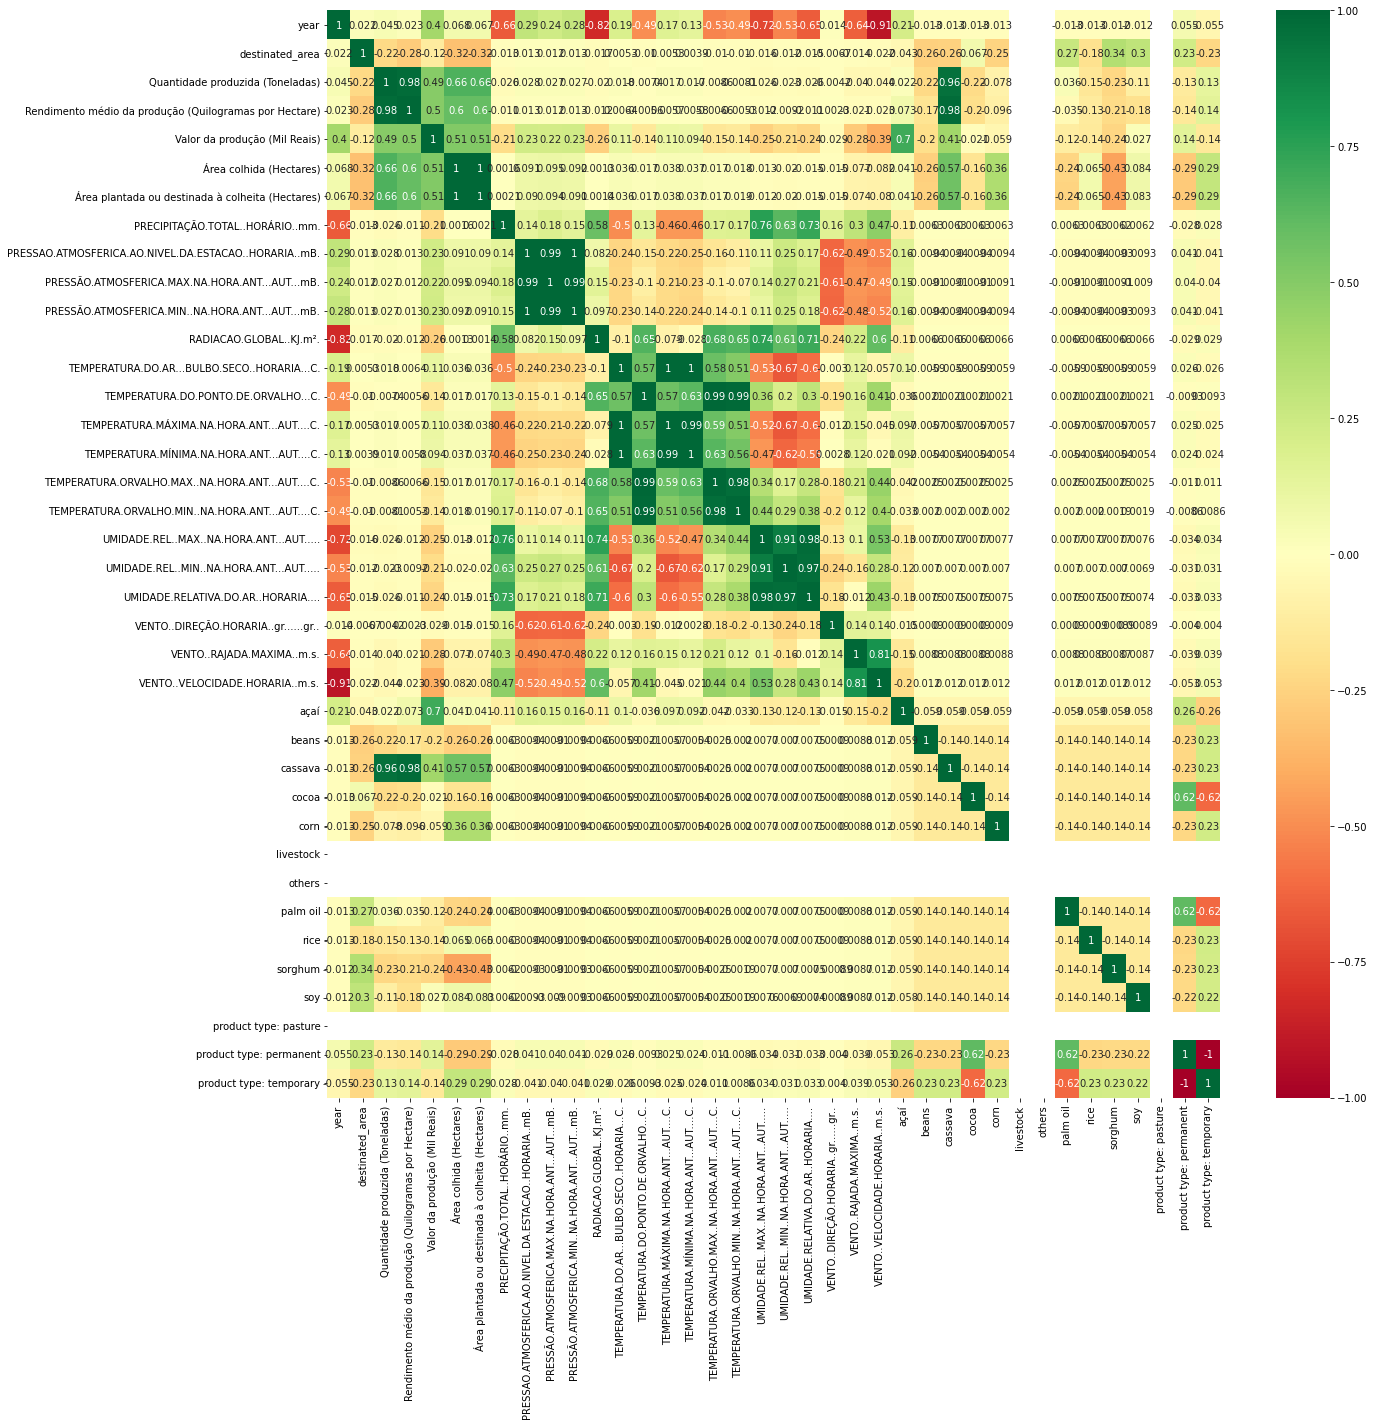

In [49]:
#Correlação
corrmat = df_total.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df_total[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Below, we are applying XGBoost with 10.000 estimators, a learning rate of 10% and 4 jobs.

In [50]:
xgbr = xgb.XGBRegressor(n_estimators=10000, learning_rate = 0.1, n_jobs=4)

In [51]:
xgbr.fit(x_train, y_train, early_stopping_rounds=5,eval_set=[(x_test, y_test)], verbose=False)

[02:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=10000, n_jobs=4)

The training score obtained is presented below.

In [52]:
score = xgbr.score(x_train, y_train)  
print("Training score: ", score)

Training score:  0.4683287551454629


In [53]:
from sklearn.metrics import mean_squared_error

It is also important to measure the obtained error. It is presented below.

In [54]:
y_pred = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 31322902.38
RMSE: 5596.69


In [55]:
y_pred

array([14264.338 , 13005.556 ,  3042.0576, ..., 12895.374 , 14158.515 ,
        3585.3022], dtype=float32)

In [56]:
y_test

37786    14433.918683
39921    14433.918683
37384      850.000000
41362       50.000000
51477    14433.918683
             ...     
35205    14433.918683
38392       40.000000
42748    14433.918683
38776    14433.918683
39238     1800.000000
Name: destinated_area, Length: 3503, dtype: float64

In [57]:
score = xgbr.score(x_test, y_test)  
score

0.4186641007117572

In [58]:
df_scaler.tail()

,Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais),Área colhida (Hectares),Área plantada ou destinada à colheita (Hectares),PRECIPITAÇÃO.TOTAL..HORÁRIO..mm.,PRESSAO.ATMOSFERICA.AO.NIVEL.DA.ESTACAO..HORARIA..mB.,PRESSÃO.ATMOSFERICA.MAX.NA.HORA.ANT...AUT...mB.,PRESSÃO.ATMOSFERICA.MIN..NA.HORA.ANT...AUT...mB.,RADIACAO.GLOBAL..KJ.m².,...,corn,livestock,others,palm oil,rice,sorghum,soy,product type: pasture,product type: permanent,product type: temporary
17509,0.087054,-0.068706,-0.216242,-0.706668,-0.708431,-0.586434,-0.124159,-0.158958,-0.145525,-0.690284,...,-0.373586,0.0,0.0,2.676758,-0.373586,-0.370603,-0.369107,0.0,1.646627,-1.646627
17510,-0.571360,-0.520807,-0.097686,-0.328355,-0.330890,-0.586434,-0.124159,-0.158958,-0.145525,-0.690284,...,-0.373586,0.0,0.0,-0.373586,-0.373586,-0.370603,-0.369107,0.0,1.646627,-1.646627
17511,-0.571360,-0.520807,-0.097686,-0.328355,-0.330890,-0.586434,-0.124159,-0.158958,-0.145525,-0.690284,...,-0.373586,0.0,0.0,-0.373586,-0.373586,-0.370603,-0.369107,0.0,1.646627,-1.646627
17512,0.087054,-0.068706,-0.216242,-0.706668,-0.708431,-0.586434,-0.124159,-0.158958,-0.145525,-0.690284,...,-0.373586,0.0,0.0,2.676758,-0.373586,-0.370603,-0.369107,0.0,1.646627,-1.646627
17513,-0.571360,-0.520807,-0.097686,-0.328355,-0.330890,-0.586434,-0.124159,-0.158958,-0.145525,-0.690284,...,-0.373586,0.0,0.0,-0.373586,-0.373586,-0.370603,-0.369107,0.0,1.646627,-1.646627


In [59]:
# pred_2018 = pred_2018.drop(["product", "year"], axis=1)
# pred_2019 = pred_2019.drop(["product", "year"], axis=1)
pred_2018.columns

Index(['Quantidade produzida (Toneladas)',
       'Rendimento médio da produção (Quilogramas por Hectare)',
       'Valor da produção (Mil Reais)', 'Área colhida (Hectares)',
       'Área plantada ou destinada à colheita (Hectares)',
       'PRECIPITAÇÃO.TOTAL..HORÁRIO..mm.',
       'PRESSAO.ATMOSFERICA.AO.NIVEL.DA.ESTACAO..HORARIA..mB.',
       'PRESSÃO.ATMOSFERICA.MAX.NA.HORA.ANT...AUT...mB.',
       'PRESSÃO.ATMOSFERICA.MIN..NA.HORA.ANT...AUT...mB.',
       'RADIACAO.GLOBAL..KJ.m².',
       'TEMPERATURA.DO.AR...BULBO.SECO..HORARIA...C.',
       'TEMPERATURA.DO.PONTO.DE.ORVALHO...C.',
       'TEMPERATURA.MÁXIMA.NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.MÍNIMA.NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.ORVALHO.MAX..NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.ORVALHO.MIN..NA.HORA.ANT...AUT....C.',
       'UMIDADE.REL..MAX..NA.HORA.ANT...AUT.....',
       'UMIDADE.REL..MIN..NA.HORA.ANT...AUT.....',
       'UMIDADE.RELATIVA.DO.AR..HORARIA....',
       'VENTO..DIREÇÃO.HORARIA..gr

In [60]:
pred_2019.columns

Index(['Quantidade produzida (Toneladas)',
       'Rendimento médio da produção (Quilogramas por Hectare)',
       'Valor da produção (Mil Reais)', 'Área colhida (Hectares)',
       'Área plantada ou destinada à colheita (Hectares)',
       'PRECIPITAÇÃO.TOTAL..HORÁRIO..mm.',
       'PRESSAO.ATMOSFERICA.AO.NIVEL.DA.ESTACAO..HORARIA..mB.',
       'PRESSÃO.ATMOSFERICA.MAX.NA.HORA.ANT...AUT...mB.',
       'PRESSÃO.ATMOSFERICA.MIN..NA.HORA.ANT...AUT...mB.',
       'RADIACAO.GLOBAL..KJ.m².',
       'TEMPERATURA.DO.AR...BULBO.SECO..HORARIA...C.',
       'TEMPERATURA.DO.PONTO.DE.ORVALHO...C.',
       'TEMPERATURA.MÁXIMA.NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.MÍNIMA.NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.ORVALHO.MAX..NA.HORA.ANT...AUT....C.',
       'TEMPERATURA.ORVALHO.MIN..NA.HORA.ANT...AUT....C.',
       'UMIDADE.REL..MAX..NA.HORA.ANT...AUT.....',
       'UMIDADE.REL..MIN..NA.HORA.ANT...AUT.....',
       'UMIDADE.RELATIVA.DO.AR..HORARIA....',
       'VENTO..DIREÇÃO.HORARIA..gr

In [61]:
len(x_train), len(x_test)

(14011, 3503)

In [62]:
len(pred_2019)

11

In [63]:
df["city_code"].value_counts()

960b4f2c94a2fb2c    517
6471ede39ca61b39    517
6a7b8c3ab2bc6c38    517
7926ffd2861f8dbc    517
783dbed4df67af9f    517
                   ... 
40abcc3eff7bcf73    473
18fb5197aa553b9c    473
807c5037e6993f2c    473
782568ced6ad8838    473
8683715784c40f0f     33
Name: city_code, Length: 144, dtype: int64

In [64]:
y_pred_2018 = xgbr.predict(pred_2018)
y_pred_2019 = xgbr.predict(pred_2019)


In [65]:
y_pred_2018

array([12515.982, 12515.982, 12515.982, 12515.982, 12515.982, 12515.982,
       12515.982, 12515.982, 12515.982, 11132.255, 12515.982],
      dtype=float32)

In [66]:
y_pred_2019

array([12515.982, 12515.982, 12515.982, 12515.982, 12515.982, 12515.982,
       12515.982, 12515.982, 12515.982, 11132.255, 12515.982],
      dtype=float32)

##Message about the model

Unfortunately, the results obtained by applying the XGBOOST algorithm did not turn out as expected. Thus, we chose to apply a Linear Regression to the Bain database, without considering the extra databases initially collected by the team.

#**5 - Implementing Linear Regression**


In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[["city_code",'product', "product_type"]]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

final_df

,year,city_code,product_type,product,destinated_area,date,0,1,2,3,...,148,149,150,151,152,153,154,155,156,157
0,1974,960b4f2c94a2fb2c,temporary,Others,0.0000,1974-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1974,746cc42bfb8f6b62,temporary,Others,0.0000,1974-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1974,6cce2bf873870afc,temporary,Others,0.0000,1974-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1974,4de42e351006a2ae,temporary,Others,0.0000,1974-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1974,5b6072f8f6d37acc,temporary,Others,0.0000,1974-01-01,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73739,2013,74d75dde6dc4a5ec,pasture,Livestock,150866.5644,2013-01-01,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73740,2014,74d75dde6dc4a5ec,pasture,Livestock,152446.3960,2014-01-01,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73741,2015,74d75dde6dc4a5ec,pasture,Livestock,154681.0205,2015-01-01,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73742,2016,74d75dde6dc4a5ec,pasture,Livestock,164706.2778,2016-01-01,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
final_df.dtypes

year                 int64
city_code           object
product_type        object
product             object
destinated_area    float64
                    ...   
153                float64
154                float64
155                float64
156                float64
157                float64
Length: 164, dtype: object

In [69]:
col_orden  = final_df.drop(["destinated_area", "product", "product_type", "city_code", "date"], axis=1).columns

In [70]:
x = final_df.drop(["destinated_area", "product", "product_type", "city_code", "date"], axis=1)
y = final_df["destinated_area"]

In [71]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [72]:
x = np.array(x.values.tolist())
y = np.array(y.values.tolist())

model = LinearRegression(normalize=True, n_jobs=-1)

In [73]:
model = LinearRegression().fit(x,y)

In [74]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope: \n', model.coef_)

coefficient of determination: 0.31171830926686517
intercept: 939282333058487.6
slope: 
 [-1.01814891e+01  4.40323113e+12  4.40323113e+12  4.40323113e+12
  4.40323113e+12  4.40323115e+12  4.40323113e+12  4.40323113e+12
  4.40323113e+12  4.40323113e+12  4.40323114e+12  4.40323118e+12
  4.40323114e+12  4.40323114e+12  4.40323113e+12  4.40323113e+12
  4.40323113e+12  4.40323113e+12  4.40323114e+12  4.40323114e+12
  4.40323113e+12  4.40323114e+12  4.40323113e+12  4.40323114e+12
  4.40323114e+12  4.40323113e+12  4.40323114e+12  4.40323114e+12
  4.40323113e+12  4.40323113e+12  4.40323115e+12  4.40323113e+12
  4.40323113e+12  4.40323114e+12  4.40323115e+12  4.40323114e+12
  4.40323113e+12  4.40323113e+12  4.40323113e+12  4.40323114e+12
  4.40323116e+12  4.40323114e+12  4.40323113e+12  4.40323113e+12
  4.40323113e+12  4.40323114e+12  4.40323115e+12  4.40323116e+12
  4.40323113e+12  4.40323114e+12  4.40323113e+12  4.40323115e+12
  4.40323113e+12  4.40323114e+12  4.40323113e+12  4.40323113e+12
  

In [75]:
download("1ZQg8VSDpIey3agzQSsuHoj95wctrRWWD") #https://drive.google.com/file/d/1ZQg8VSDpIey3agzQSsuHoj95wctrRWWD/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZQg8VSDpIey3agzQSsuHoj95wctrRWWD
To: /content/submission-template.csv
100%|██████████| 102k/102k [00:00<00:00, 60.4MB/s]


In [76]:
pred_2018_2019 = pd.read_csv("/content/submission-template.csv")
copy = pred_2018_2019

In [77]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(pred_2018_2019[["city_code",'product', "product_type"]]).toarray())

#merge one-hot encoded columns back with original DataFrame
pred_df = pred_2018_2019.join(encoder_df)

pred_df

,Unnamed: 0,year,city_code,product_type,product,destinated_area,0,1,2,3,...,148,149,150,151,152,153,154,155,156,157
0,0,2018-01-01,0307883b5d063703,pasture,Livestock,NaN,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2018-01-01,0307883b5d063703,permanent,Açaí,NaN,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2018-01-01,0307883b5d063703,permanent,Others,NaN,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,2018-01-01,0307883b5d063703,temporary,Cassava,NaN,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,2018-01-01,0307883b5d063703,temporary,Others,NaN,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,1005,2019-01-01,fda49275fbf5caf6,permanent,Cocoa,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016,1006,2019-01-01,fda49275fbf5caf6,permanent,Others,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017,1007,2019-01-01,fda49275fbf5caf6,temporary,Beans,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018,1008,2019-01-01,fda49275fbf5caf6,temporary,Cassava,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
pred_df['date'] = pd.to_datetime(pred_df['year'],format= "%Y-%d-%m")
pred_df['year'] = pd.DatetimeIndex(pred_df['date']).year


In [79]:
pred_df = pred_df.reindex(columns=col_orden)

In [80]:
pred_df

,year,0,1,2,3,4,5,6,7,8,...,148,149,150,151,152,153,154,155,156,157
0,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
# pred_2018_2019 = pred_df.drop(["destinated_area", "product", "product_type", "city_code", "date", "Unnamed: 0"], axis=1)
pred_2018_2019 = pred_df

In [82]:
pred_2018_2019.shape

(2020, 159)

In [83]:
x.shape

(73744, 159)

In [84]:
linear_pred_2018_2018 = model.predict(pred_2018_2019)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [85]:
linear_pred_2018_2018

array([93847.375,  8914.75 , -4347.25 , ...,  5471.625,  5557.75 ,
        5673.875])

In [86]:
pred_2018_2019

,year,0,1,2,3,4,5,6,7,8,...,148,149,150,151,152,153,154,155,156,157
0,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
copy

,Unnamed: 0,year,city_code,product_type,product,destinated_area
0,0,2018-01-01,0307883b5d063703,pasture,Livestock,NaN
1,1,2018-01-01,0307883b5d063703,permanent,Açaí,NaN
2,2,2018-01-01,0307883b5d063703,permanent,Others,NaN
3,3,2018-01-01,0307883b5d063703,temporary,Cassava,NaN
4,4,2018-01-01,0307883b5d063703,temporary,Others,NaN
...,...,...,...,...,...,...
2015,1005,2019-01-01,fda49275fbf5caf6,permanent,Cocoa,NaN
2016,1006,2019-01-01,fda49275fbf5caf6,permanent,Others,NaN
2017,1007,2019-01-01,fda49275fbf5caf6,temporary,Beans,NaN
2018,1008,2019-01-01,fda49275fbf5caf6,temporary,Cassava,NaN


In [88]:
copy["destinated_area"] = linear_pred_2018_2018
del copy["Unnamed: 0"]

In [89]:
copy

,year,city_code,product_type,product,destinated_area
0,2018-01-01,0307883b5d063703,pasture,Livestock,93847.375
1,2018-01-01,0307883b5d063703,permanent,Açaí,8914.750
2,2018-01-01,0307883b5d063703,permanent,Others,-4347.250
3,2018-01-01,0307883b5d063703,temporary,Cassava,2064.750
4,2018-01-01,0307883b5d063703,temporary,Others,-4797.500
...,...,...,...,...,...
2015,2019-01-01,fda49275fbf5caf6,permanent,Cocoa,9182.750
2016,2019-01-01,fda49275fbf5caf6,permanent,Others,-854.250
2017,2019-01-01,fda49275fbf5caf6,temporary,Beans,5471.625
2018,2019-01-01,fda49275fbf5caf6,temporary,Cassava,5557.750


The cell below is in comment format, since its command is to download the final submission file.

In [90]:
# from google.colab import files
# copy.to_csv('DG2Z8G.csv') 
# files.download('DG2Z8G.csv')